In [1]:
import tensorflow as tf
import os
import numpy as np
from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm

2024-05-11 11:05:00.589002: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered

2024-05-11 11:05:00.589105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered

2024-05-11 11:05:00.714627: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import os
# Define the path for the empty folder
folder_path = '/kaggle/working/empty_folderf3/'

# Create the empty folder
os.makedirs(folder_path, exist_ok=True)
save_dir = ('/kaggle/working/empty_folderf3')


In [3]:
from sklearn.model_selection import train_test_split

# Split dataset into training and validation sets
train_dir = '/kaggle/input/gtsrb-train/Train'
train_data, val_data = train_test_split(os.listdir(train_dir), test_size=0.2, random_state=42)

# Create training and validation datasets
train_dataset = keras.preprocessing.image_dataset_from_directory(
    directory=train_dir, 
    labels='inferred',  # Use inferred labels from directory structure
    label_mode='categorical', 
    image_size=(64, 64), 
    batch_size=64,
    shuffle=True,
    validation_split=0.2,  # Percentage of data to use for validation
    subset="training",
    seed=42  # Specify seed for reproducibility
).map(lambda x, y: (x/255.0, y))  # Normalize the pixel values to [0, 1]

val_dataset = keras.preprocessing.image_dataset_from_directory(
    directory=train_dir, 
    labels='inferred',  # Use inferred labels from directory structure
    label_mode='categorical', 
    image_size=(64, 64), 
    batch_size=64,
    shuffle=True,
    validation_split=0.2,  # Percentage of data to use for validation
    subset="validation",
    seed=42  # Specify seed for reproducibility
).map(lambda x, y: (x/255.0, y))  # Normalize the pixel values to [0, 1])


Found 39209 files belonging to 43 classes.

Using 31368 files for training.

Found 39209 files belonging to 43 classes.

Using 7841 files for validation.


In [4]:
#nnnnnnneeeeewwwwwwwwww   mmmmooodeeel

In [5]:
latent_dim = 128

# Encoder
encoder = keras.Sequential([
    layers.Input(shape=(64, 64, 3)),
    layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(0.2),
    layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(0.2),
    layers.Conv2D(256, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(0.2),
    layers.Conv2D(512, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(0.2),
    layers.Flatten(),
    layers.Dense(latent_dim)  # Latent representation
])

# Decoder
decoder = keras.Sequential([
    layers.Input(shape=(latent_dim,)),
    layers.Dense(8*8*512),
    layers.Reshape((8, 8, 512)),
    layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(0.2),
    layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(0.2),
    layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(0.2),
    layers.Conv2DTranspose(3, kernel_size=4,  padding="same", activation="tanh"),
])

# Full autoencoder model
autoencoder = keras.Sequential([
    layers.Input(shape=(64, 64, 3)),
    encoder,
    decoder
])


In [6]:
from tensorflow.keras import layers, models, optimizers

In [ ]:
import tensorflow as tf

class CustomModel(tf.keras.Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        
        # Define layers
        self.conv1 = tf.keras.layers.Conv2D(250, kernel_size=7, activation='relu', input_shape=(64,64 3))
        self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=2)
        self.norm1 = tf.keras.layers.BatchNormalization()
        
        self.conv2 = tf.keras.layers.Conv2D(300, kernel_size=4, activation='relu')
        self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=2)
        self.norm2 = tf.keras.layers.BatchNormalization()
        
        self.conv3 = tf.keras.layers.Conv2D(350, kernel_size=4, activation='relu')
        self.pool3 = tf.keras.layers.MaxPooling2D(pool_size=2)
        self.norm3 = tf.keras.layers.BatchNormalization()
        
        self.conv4 = tf.keras.layers.Conv2D(400, kernel_size=4, activation='relu')
        self.pool4 = tf.keras.layers.MaxPooling2D(pool_size=2)
        self.norm4 = tf.keras.layers.BatchNormalization()
        
        self.flatten = tf.keras.layers.Flatten()
    
        self.fc1 = tf.keras.layers.Dense(400, activation='relu')
        self.dropout1 = tf.keras.layers.Dropout(0.5)  # Dropout layer
        self.fc2 = tf.keras.layers.Dense(200, activation='relu')
        self.dropout2 = tf.keras.layers.Dropout(0.5)  # Dropout layer
        self.fc3 = tf.keras.layers.Dense(43, activation='softmax')
    
    def call(self, inputs):
        # Forward pass
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.norm1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.norm2(x)
        x = self.conv3(x)
        x = self.pool3(x)
        x = self.norm3(x)
        x = self.conv4(x)
        x = self.pool4(x)
        x = self.norm4(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout1(x)  # Dropout layer
        x = self.fc2(x)
        x = self.dropout2(x)  # Dropout layer
        x = self.fc3(x)
        return x

# Create an instance of the model
discriminator = CustomModel()
discriminator .summary()


In [8]:
# Loss functions
loss_fn_auto = tf.keras.losses.MeanSquaredError()
loss_fn_disc = tf.keras.losses.CategoricalCrossentropy()

# Optimizers
opt_autoencoder = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
opt_disc = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)


# Compile the autoencoder model
autoencoder.compile(optimizer=opt_autoencoder, loss=loss_fn_auto)

# Compile the discriminator model
discriminator.compile(optimizer=opt_disc, loss=loss_fn_disc, metrics=['accuracy'])

In [9]:
autoencoder_losses_epoch = []
discriminator_losses_epoch = []
discriminator_acc_epoch = []
val_autoencoder_losses_epoch = []
val_discriminator_losses_epoch = []
val_discriminator_acc_epoch = []

for epoch in range(100):
    # Initialize epoch-wise metrics
    epoch_autoencoder_losses = []
    epoch_discriminator_losses = []
    epoch_discriminator_acc = []
    epoch_val_autoencoder_losses = []
    epoch_val_discriminator_losses = []
    epoch_val_discriminator_acc = []

    # Training loop
    for idx, (batch_real, batch_label) in enumerate(tqdm(train_dataset)):
        # Training steps
        with tf.GradientTape() as autoencoder_tape, tf.GradientTape() as disc_tape:
            latent_representation = encoder(batch_real)
            generated_image = decoder(latent_representation)
            loss_autoencoder = loss_fn_auto(batch_real, generated_image)
            
            fake = generated_image
            loss_disc_real = loss_fn_disc(batch_label, discriminator(batch_real))
            loss_disc_fake = loss_fn_disc(batch_label, discriminator(fake))
            loss_disc = (loss_disc_real + loss_disc_fake) / 2

        grads_autoencoder = autoencoder_tape.gradient(loss_autoencoder, autoencoder.trainable_weights)
        opt_autoencoder.apply_gradients(zip(grads_autoencoder, autoencoder.trainable_weights))

        grads_discriminator = disc_tape.gradient(loss_disc, discriminator.trainable_weights)
        opt_disc.apply_gradients(zip(grads_discriminator, discriminator.trainable_weights))

        # Store batch-wise metrics
        epoch_autoencoder_losses.append(loss_autoencoder.numpy())
        epoch_discriminator_losses.append(loss_disc.numpy())
        epoch_discriminator_acc.append(tf.reduce_mean(tf.keras.metrics.categorical_accuracy(batch_label, discriminator(fake))).numpy())
        if idx % 200 == 0:
            img = tf.keras.preprocessing.image.array_to_img(fake[0])
            img.save(f"{save_dir}/generated_img_epoch_{epoch}_batch_{idx}.png")

    # Validation loop
    for val_batch_real, val_batch_label in val_dataset:
        val_latent_representation = encoder(val_batch_real)
        val_generated_image = decoder(val_latent_representation)
        val_loss_autoencoder = loss_fn_auto(val_batch_real, val_generated_image)
        val_loss_disc_real = loss_fn_disc(val_batch_label, discriminator(val_batch_real))
        val_loss_disc_fake = loss_fn_disc(val_batch_label, discriminator(val_generated_image))
        val_loss_disc = (val_loss_disc_real + val_loss_disc_fake) / 2

        # Calculate accuracy
        val_discriminator_accuracy = tf.reduce_mean(tf.keras.metrics.categorical_accuracy(val_batch_label, discriminator(val_generated_image)))

        # Store validation metrics
        epoch_val_autoencoder_losses.append(val_loss_autoencoder.numpy())
        epoch_val_discriminator_losses.append(val_loss_disc.numpy())
        epoch_val_discriminator_acc.append(val_discriminator_accuracy.numpy())

    # Calculate epoch-wise averages and append to the lists
    avg_autoencoder_loss = np.mean(epoch_autoencoder_losses)
    avg_discriminator_loss = np.mean(epoch_discriminator_losses)
    avg_discriminator_acc = np.mean(epoch_discriminator_acc)
    avg_val_autoencoder_loss = np.mean(epoch_val_autoencoder_losses)
    avg_val_discriminator_loss = np.mean(epoch_val_discriminator_losses)
    avg_val_discriminator_acc = np.mean(epoch_val_discriminator_acc)

    autoencoder_losses_epoch.append(avg_autoencoder_loss)
    discriminator_losses_epoch.append(avg_discriminator_loss)
    discriminator_acc_epoch.append(avg_discriminator_acc)
    val_autoencoder_losses_epoch.append(avg_val_autoencoder_loss)
    val_discriminator_losses_epoch.append(avg_val_discriminator_loss)
    val_discriminator_acc_epoch.append(avg_val_discriminator_acc)

    # Print epoch-wise metrics
    print(f"Epoch {epoch}, Autoencoder Loss: {avg_autoencoder_loss}, Discriminator Loss: {avg_discriminator_loss}, Discriminator Accuracy: {avg_discriminator_acc}")
    print(f"Validation - Autoencoder Loss: {avg_val_autoencoder_loss}, Discriminator Loss: {avg_val_discriminator_loss}, Discriminator Accuracy: {avg_val_discriminator_acc}")


100%|██████████| 491/491 [02:49<00:00,  2.89it/s]


Epoch 0, Autoencoder Loss: 0.02457812987267971, Discriminator Loss: 2.6859304904937744, Discriminator Accuracy: 0.1916687935590744

Validation - Autoencoder Loss: 0.0154438316822052, Discriminator Loss: 1.6336791515350342, Discriminator Accuracy: 0.33172425627708435


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 1, Autoencoder Loss: 0.011443930678069592, Discriminator Loss: 0.8283368945121765, Discriminator Accuracy: 0.7194819450378418

Validation - Autoencoder Loss: 0.009584834799170494, Discriminator Loss: 0.4991210997104645, Discriminator Accuracy: 0.7454499006271362


100%|██████████| 491/491 [03:21<00:00,  2.43it/s]


Epoch 2, Autoencoder Loss: 0.007915941067039967, Discriminator Loss: 0.31585174798965454, Discriminator Accuracy: 0.9220340847969055

Validation - Autoencoder Loss: 0.007134341634809971, Discriminator Loss: 0.24087956547737122, Discriminator Accuracy: 0.8738952279090881


100%|██████████| 491/491 [02:30<00:00,  3.26it/s]


Epoch 3, Autoencoder Loss: 0.0066740247420966625, Discriminator Loss: 0.1689465343952179, Discriminator Accuracy: 0.9703729748725891

Validation - Autoencoder Loss: 0.005827244836837053, Discriminator Loss: 0.47522518038749695, Discriminator Accuracy: 0.8638673424720764


100%|██████████| 491/491 [02:31<00:00,  3.24it/s]


Epoch 4, Autoencoder Loss: 0.0053757862187922, Discriminator Loss: 0.08570633828639984, Discriminator Accuracy: 0.9915987849235535

Validation - Autoencoder Loss: 0.005039534531533718, Discriminator Loss: 0.09019064158201218, Discriminator Accuracy: 0.961135745048523


100%|██████████| 491/491 [02:31<00:00,  3.24it/s]


Epoch 5, Autoencoder Loss: 0.004655442666262388, Discriminator Loss: 0.048617005348205566, Discriminator Accuracy: 0.9978678822517395

Validation - Autoencoder Loss: 0.004661838058382273, Discriminator Loss: 0.10277152806520462, Discriminator Accuracy: 0.9540219306945801


100%|██████████| 491/491 [02:31<00:00,  3.24it/s]


Epoch 6, Autoencoder Loss: 0.004267368000000715, Discriminator Loss: 0.030062414705753326, Discriminator Accuracy: 0.998854398727417

Validation - Autoencoder Loss: 0.004566286224871874, Discriminator Loss: 0.1984700709581375, Discriminator Accuracy: 0.939166784286499


100%|██████████| 491/491 [02:31<00:00,  3.24it/s]


Epoch 7, Autoencoder Loss: 0.0038602983113378286, Discriminator Loss: 0.03128378838300705, Discriminator Accuracy: 0.9991089701652527

Validation - Autoencoder Loss: 0.009043584577739239, Discriminator Loss: 0.09735216200351715, Discriminator Accuracy: 0.9584680795669556


100%|██████████| 491/491 [02:31<00:00,  3.24it/s]


Epoch 8, Autoencoder Loss: 0.004662944935262203, Discriminator Loss: 0.07199621200561523, Discriminator Accuracy: 0.9873345494270325

Validation - Autoencoder Loss: 0.004176054149866104, Discriminator Loss: 0.04051807522773743, Discriminator Accuracy: 0.985264241695404


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 9, Autoencoder Loss: 0.0034063896164298058, Discriminator Loss: 0.00984047632664442, Discriminator Accuracy: 0.9998726844787598

Validation - Autoencoder Loss: 0.003857253585010767, Discriminator Loss: 0.048407163470983505, Discriminator Accuracy: 0.9808180928230286


100%|██████████| 491/491 [03:21<00:00,  2.43it/s]


Epoch 10, Autoencoder Loss: 0.0032679117284715176, Discriminator Loss: 0.01307709515094757, Discriminator Accuracy: 0.9994271993637085

Validation - Autoencoder Loss: 0.0033139653969556093, Discriminator Loss: 0.042764585465192795, Discriminator Accuracy: 0.9829853177070618


100%|██████████| 491/491 [02:31<00:00,  3.25it/s]


Epoch 11, Autoencoder Loss: 0.003113838844001293, Discriminator Loss: 0.012211420573294163, Discriminator Accuracy: 0.9996817708015442

Validation - Autoencoder Loss: 0.0031723829451948404, Discriminator Loss: 0.03412506356835365, Discriminator Accuracy: 0.9876855611801147


100%|██████████| 491/491 [02:30<00:00,  3.25it/s]


Epoch 12, Autoencoder Loss: 0.0029990237671881914, Discriminator Loss: 0.010363437235355377, Discriminator Accuracy: 0.9996181130409241

Validation - Autoencoder Loss: 0.003171380143612623, Discriminator Loss: 0.047579485923051834, Discriminator Accuracy: 0.9824694991111755


100%|██████████| 491/491 [02:31<00:00,  3.25it/s]


Epoch 13, Autoencoder Loss: 0.0031131207942962646, Discriminator Loss: 0.028086280450224876, Discriminator Accuracy: 0.9971677660942078

Validation - Autoencoder Loss: 0.0030784113332629204, Discriminator Loss: 0.08532973378896713, Discriminator Accuracy: 0.972942054271698


100%|██████████| 491/491 [02:31<00:00,  3.25it/s]


Epoch 14, Autoencoder Loss: 0.0028131967410445213, Discriminator Loss: 0.01067460235208273, Discriminator Accuracy: 0.9998090863227844

Validation - Autoencoder Loss: 0.003086317330598831, Discriminator Loss: 0.03271004557609558, Discriminator Accuracy: 0.9880666136741638


100%|██████████| 491/491 [02:31<00:00,  3.24it/s]


Epoch 15, Autoencoder Loss: 0.0027163014747202396, Discriminator Loss: 0.010312238708138466, Discriminator Accuracy: 0.9994908571243286

Validation - Autoencoder Loss: 0.003106416668742895, Discriminator Loss: 0.5106192231178284, Discriminator Accuracy: 0.9146572351455688


100%|██████████| 491/491 [02:30<00:00,  3.27it/s]


Epoch 16, Autoencoder Loss: 0.002600389765575528, Discriminator Loss: 0.010097283869981766, Discriminator Accuracy: 0.9999045133590698

Validation - Autoencoder Loss: 0.0032601081766188145, Discriminator Loss: 0.03111839108169079, Discriminator Accuracy: 0.988193690776825


100%|██████████| 491/491 [02:31<00:00,  3.25it/s]


Epoch 17, Autoencoder Loss: 0.002560392254963517, Discriminator Loss: 0.011549267917871475, Discriminator Accuracy: 0.9998090863227844

Validation - Autoencoder Loss: 0.0028625777922570705, Discriminator Loss: 0.03731995448470116, Discriminator Accuracy: 0.9866616129875183


100%|██████████| 491/491 [02:30<00:00,  3.25it/s]


Epoch 18, Autoencoder Loss: 0.002457845024764538, Discriminator Loss: 0.0037378089036792517, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0030566498171538115, Discriminator Loss: 0.037392694503068924, Discriminator Accuracy: 0.9878048896789551


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 19, Autoencoder Loss: 0.0023971868213266134, Discriminator Loss: 0.006423115264624357, Discriminator Accuracy: 0.9996181130409241

Validation - Autoencoder Loss: 0.003387702628970146, Discriminator Loss: 0.19085702300071716, Discriminator Accuracy: 0.9390397667884827


100%|██████████| 491/491 [02:34<00:00,  3.19it/s]


Epoch 20, Autoencoder Loss: 0.002355490578338504, Discriminator Loss: 0.009420381858944893, Discriminator Accuracy: 0.9999363422393799

Validation - Autoencoder Loss: 0.00317943561822176, Discriminator Loss: 0.03180653601884842, Discriminator Accuracy: 0.9880589246749878


100%|██████████| 491/491 [02:30<00:00,  3.27it/s]


Epoch 21, Autoencoder Loss: 0.0022858718875795603, Discriminator Loss: 0.0032046653795987368, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.0027040818240493536, Discriminator Loss: 0.03776130452752113, Discriminator Accuracy: 0.9850178360939026


100%|██████████| 491/491 [02:29<00:00,  3.28it/s]


Epoch 22, Autoencoder Loss: 0.0022084610536694527, Discriminator Loss: 0.011878241784870625, Discriminator Accuracy: 0.999554455280304

Validation - Autoencoder Loss: 0.0027044019661843777, Discriminator Loss: 0.055793195962905884, Discriminator Accuracy: 0.9790472984313965


100%|██████████| 491/491 [02:29<00:00,  3.28it/s]


Epoch 23, Autoencoder Loss: 0.0021558664739131927, Discriminator Loss: 0.0021484165918082, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.002759628463536501, Discriminator Loss: 0.024642448872327805, Discriminator Accuracy: 0.9908536672592163


100%|██████████| 491/491 [02:29<00:00,  3.27it/s]


Epoch 24, Autoencoder Loss: 0.002158934948965907, Discriminator Loss: 0.007052297238260508, Discriminator Accuracy: 0.9997772574424744

Validation - Autoencoder Loss: 0.0027531823143363, Discriminator Loss: 0.022468823939561844, Discriminator Accuracy: 0.9907266497612


100%|██████████| 491/491 [02:30<00:00,  3.26it/s]


Epoch 25, Autoencoder Loss: 0.0021474186796694994, Discriminator Loss: 0.007702415343374014, Discriminator Accuracy: 0.999586284160614

Validation - Autoencoder Loss: 0.0026474641636013985, Discriminator Loss: 0.02694554254412651, Discriminator Accuracy: 0.9881860017776489


100%|██████████| 491/491 [02:31<00:00,  3.25it/s]


Epoch 26, Autoencoder Loss: 0.001997486688196659, Discriminator Loss: 0.002669740468263626, Discriminator Accuracy: 0.9999363422393799

Validation - Autoencoder Loss: 0.0027473957743495703, Discriminator Loss: 0.0248224139213562, Discriminator Accuracy: 0.990734338760376


100%|██████████| 491/491 [02:32<00:00,  3.23it/s]


Epoch 27, Autoencoder Loss: 0.0019512788858264685, Discriminator Loss: 0.010886655189096928, Discriminator Accuracy: 0.9994271993637085

Validation - Autoencoder Loss: 0.0026605352759361267, Discriminator Loss: 0.037131112068891525, Discriminator Accuracy: 0.9857723712921143


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 28, Autoencoder Loss: 0.001928978250361979, Discriminator Loss: 0.007382696960121393, Discriminator Accuracy: 0.9999363422393799

Validation - Autoencoder Loss: 0.002670619636774063, Discriminator Loss: 0.03735775500535965, Discriminator Accuracy: 0.9864075183868408


100%|██████████| 491/491 [02:33<00:00,  3.19it/s]


Epoch 29, Autoencoder Loss: 0.0019073367584496737, Discriminator Loss: 0.0017378245247527957, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0031048431992530823, Discriminator Loss: 0.026814868673682213, Discriminator Accuracy: 0.9878125786781311


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 30, Autoencoder Loss: 0.0018833057256415486, Discriminator Loss: 0.0006885233451612294, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0025707180611789227, Discriminator Loss: 0.026353996247053146, Discriminator Accuracy: 0.9921239614486694


100%|██████████| 491/491 [02:31<00:00,  3.24it/s]


Epoch 31, Autoencoder Loss: 0.0018109434749931097, Discriminator Loss: 0.0032930101733654737, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.003520755562931299, Discriminator Loss: 0.06597079336643219, Discriminator Accuracy: 0.9726880192756653


100%|██████████| 491/491 [02:30<00:00,  3.25it/s]


Epoch 32, Autoencoder Loss: 0.0017907703295350075, Discriminator Loss: 0.009177293628454208, Discriminator Accuracy: 0.9996817708015442

Validation - Autoencoder Loss: 0.0026771193370223045, Discriminator Loss: 0.03154221549630165, Discriminator Accuracy: 0.9888288378715515


100%|██████████| 491/491 [02:30<00:00,  3.25it/s]


Epoch 33, Autoencoder Loss: 0.001887700636871159, Discriminator Loss: 0.0065987203270196915, Discriminator Accuracy: 0.999586284160614

Validation - Autoencoder Loss: 0.0026823144871741533, Discriminator Loss: 0.022913219407200813, Discriminator Accuracy: 0.9916235208511353


100%|██████████| 491/491 [02:30<00:00,  3.25it/s]


Epoch 34, Autoencoder Loss: 0.001675752573646605, Discriminator Loss: 0.002454229397699237, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.003287465078756213, Discriminator Loss: 0.030261168256402016, Discriminator Accuracy: 0.988574743270874


100%|██████████| 491/491 [02:30<00:00,  3.27it/s]


Epoch 35, Autoencoder Loss: 0.0016943083610385656, Discriminator Loss: 0.0009092522086575627, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.003022458404302597, Discriminator Loss: 0.0667603611946106, Discriminator Accuracy: 0.9789125919342041


100%|██████████| 491/491 [02:30<00:00,  3.26it/s]


Epoch 36, Autoencoder Loss: 0.0016845797654241323, Discriminator Loss: 0.004236774053424597, Discriminator Accuracy: 0.9999363422393799

Validation - Autoencoder Loss: 0.0026945166755467653, Discriminator Loss: 0.026578254997730255, Discriminator Accuracy: 0.9919969439506531


100%|██████████| 491/491 [02:31<00:00,  3.25it/s]


Epoch 37, Autoencoder Loss: 0.0016498626209795475, Discriminator Loss: 0.002949213143438101, Discriminator Accuracy: 0.9999363422393799

Validation - Autoencoder Loss: 0.0028317903634160757, Discriminator Loss: 0.031758662313222885, Discriminator Accuracy: 0.989456295967102


100%|██████████| 491/491 [02:30<00:00,  3.26it/s]


Epoch 38, Autoencoder Loss: 0.0017571147764101624, Discriminator Loss: 0.0071169668808579445, Discriminator Accuracy: 0.9996499419212341

Validation - Autoencoder Loss: 0.002697581425309181, Discriminator Loss: 0.021511852741241455, Discriminator Accuracy: 0.9916158318519592


100%|██████████| 491/491 [02:30<00:00,  3.26it/s]


Epoch 39, Autoencoder Loss: 0.0015822938876226544, Discriminator Loss: 0.00023279074230231345, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.002778183901682496, Discriminator Loss: 0.022903718054294586, Discriminator Accuracy: 0.9931402206420898


100%|██████████| 491/491 [02:30<00:00,  3.26it/s]


Epoch 40, Autoencoder Loss: 0.0015983193879947066, Discriminator Loss: 0.0015719616785645485, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.0026966785080730915, Discriminator Loss: 0.0240499135106802, Discriminator Accuracy: 0.9925050735473633


100%|██████████| 491/491 [02:31<00:00,  3.25it/s]


Epoch 41, Autoencoder Loss: 0.0015738607617095113, Discriminator Loss: 0.005993450991809368, Discriminator Accuracy: 0.9998726844787598

Validation - Autoencoder Loss: 0.002679063705727458, Discriminator Loss: 0.02360333316028118, Discriminator Accuracy: 0.9907266497612


100%|██████████| 491/491 [02:31<00:00,  3.24it/s]


Epoch 42, Autoencoder Loss: 0.0015538014704361558, Discriminator Loss: 0.001395400962792337, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.003126818686723709, Discriminator Loss: 0.02594292350113392, Discriminator Accuracy: 0.9899721145629883


100%|██████████| 491/491 [02:30<00:00,  3.26it/s]


Epoch 43, Autoencoder Loss: 0.0015350953908637166, Discriminator Loss: 0.004471063148230314, Discriminator Accuracy: 0.9998090863227844

Validation - Autoencoder Loss: 0.002613140968605876, Discriminator Loss: 0.025726880878210068, Discriminator Accuracy: 0.9899644255638123


100%|██████████| 491/491 [02:30<00:00,  3.26it/s]


Epoch 44, Autoencoder Loss: 0.001506522297859192, Discriminator Loss: 0.003080210415646434, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.0025797782000154257, Discriminator Loss: 0.019940242171287537, Discriminator Accuracy: 0.992385745048523


100%|██████████| 491/491 [02:30<00:00,  3.26it/s]


Epoch 45, Autoencoder Loss: 0.0015038761775940657, Discriminator Loss: 0.00013662935816682875, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026238628197461367, Discriminator Loss: 0.021512296050786972, Discriminator Accuracy: 0.9935213327407837


100%|██████████| 491/491 [02:32<00:00,  3.23it/s]


Epoch 46, Autoencoder Loss: 0.0014887959696352482, Discriminator Loss: 0.005273063201457262, Discriminator Accuracy: 0.9999045133590698

Validation - Autoencoder Loss: 0.0032887356355786324, Discriminator Loss: 0.025077782571315765, Discriminator Accuracy: 0.9900914430618286


100%|██████████| 491/491 [02:31<00:00,  3.23it/s]


Epoch 47, Autoencoder Loss: 0.0014749839901924133, Discriminator Loss: 0.002599440049380064, Discriminator Accuracy: 0.9998409152030945

Validation - Autoencoder Loss: 0.0027136129792779684, Discriminator Loss: 0.03257047384977341, Discriminator Accuracy: 0.9904956221580505


100%|██████████| 491/491 [02:31<00:00,  3.23it/s]


Epoch 48, Autoencoder Loss: 0.0014593317173421383, Discriminator Loss: 0.0007544895634055138, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.0026355069130659103, Discriminator Loss: 0.025985395535826683, Discriminator Accuracy: 0.9917429089546204


100%|██████████| 491/491 [02:31<00:00,  3.24it/s]


Epoch 49, Autoencoder Loss: 0.0014365246752277017, Discriminator Loss: 0.0002656220458447933, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0030438394751399755, Discriminator Loss: 0.03197666257619858, Discriminator Accuracy: 0.9871851205825806


100%|██████████| 491/491 [02:31<00:00,  3.23it/s]


Epoch 50, Autoencoder Loss: 0.0014265169156715274, Discriminator Loss: 6.716080679325387e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.002637114841490984, Discriminator Loss: 0.022385824471712112, Discriminator Accuracy: 0.9937754273414612


100%|██████████| 491/491 [02:31<00:00,  3.25it/s]


Epoch 51, Autoencoder Loss: 0.0014105034060776234, Discriminator Loss: 2.7586589567363262e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026236223056912422, Discriminator Loss: 0.023719247430562973, Discriminator Accuracy: 0.9942835569381714


100%|██████████| 491/491 [02:31<00:00,  3.24it/s]


Epoch 52, Autoencoder Loss: 0.0013924628729000688, Discriminator Loss: 0.010345232672989368, Discriminator Accuracy: 0.9993317127227783

Validation - Autoencoder Loss: 0.0026840735226869583, Discriminator Loss: 0.023893600329756737, Discriminator Accuracy: 0.9902262091636658


100%|██████████| 491/491 [02:32<00:00,  3.23it/s]


Epoch 53, Autoencoder Loss: 0.0013912409776821733, Discriminator Loss: 0.0006372442585416138, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.0027820293325930834, Discriminator Loss: 0.028114615008234978, Discriminator Accuracy: 0.9919969439506531


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 54, Autoencoder Loss: 0.0013852972770109773, Discriminator Loss: 0.0018441008869558573, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.003588436869904399, Discriminator Loss: 0.02455509640276432, Discriminator Accuracy: 0.9919969439506531


100%|██████████| 491/491 [02:31<00:00,  3.23it/s]


Epoch 55, Autoencoder Loss: 0.0013748944038525224, Discriminator Loss: 0.0015216751489788294, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026748545933514833, Discriminator Loss: 0.02414333075284958, Discriminator Accuracy: 0.9922510385513306


100%|██████████| 491/491 [02:31<00:00,  3.24it/s]


Epoch 56, Autoencoder Loss: 0.001347919343970716, Discriminator Loss: 0.0003681825182866305, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026956130750477314, Discriminator Loss: 0.022776631638407707, Discriminator Accuracy: 0.9931402206420898


100%|██████████| 491/491 [02:31<00:00,  3.24it/s]


Epoch 57, Autoencoder Loss: 0.001348725170828402, Discriminator Loss: 0.0034175110049545765, Discriminator Accuracy: 0.9998409152030945

Validation - Autoencoder Loss: 0.0026334035210311413, Discriminator Loss: 0.048908427357673645, Discriminator Accuracy: 0.9819613695144653


100%|██████████| 491/491 [02:31<00:00,  3.23it/s]


Epoch 58, Autoencoder Loss: 0.001331712701357901, Discriminator Loss: 0.003963228315114975, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.0026787780225276947, Discriminator Loss: 0.02948622964322567, Discriminator Accuracy: 0.9909806847572327


100%|██████████| 491/491 [02:31<00:00,  3.23it/s]


Epoch 59, Autoencoder Loss: 0.0013209051685407758, Discriminator Loss: 9.5757917733863e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026397116016596556, Discriminator Loss: 0.024365834891796112, Discriminator Accuracy: 0.9914888143539429


100%|██████████| 491/491 [02:31<00:00,  3.25it/s]


Epoch 60, Autoencoder Loss: 0.0013040699996054173, Discriminator Loss: 3.3875014196382836e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.002793526044115424, Discriminator Loss: 0.02638639509677887, Discriminator Accuracy: 0.9918699264526367


100%|██████████| 491/491 [02:31<00:00,  3.24it/s]


Epoch 61, Autoencoder Loss: 0.0013091422151774168, Discriminator Loss: 0.0039406404830515385, Discriminator Accuracy: 0.9999363422393799

Validation - Autoencoder Loss: 0.0026663322933018208, Discriminator Loss: 0.030064167454838753, Discriminator Accuracy: 0.9907266497612


100%|██████████| 491/491 [02:33<00:00,  3.19it/s]


Epoch 62, Autoencoder Loss: 0.001289750449359417, Discriminator Loss: 0.00023005456023383886, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0027232191059738398, Discriminator Loss: 0.023384492844343185, Discriminator Accuracy: 0.9923780560493469


100%|██████████| 491/491 [02:32<00:00,  3.23it/s]


Epoch 63, Autoencoder Loss: 0.001304506789892912, Discriminator Loss: 0.0015590846305713058, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.0026004817336797714, Discriminator Loss: 0.07356157898902893, Discriminator Accuracy: 0.9795477390289307


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 64, Autoencoder Loss: 0.0012509948574006557, Discriminator Loss: 0.002644472988322377, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.0026465188711881638, Discriminator Loss: 0.024373721331357956, Discriminator Accuracy: 0.9935367107391357


100%|██████████| 491/491 [02:33<00:00,  3.21it/s]


Epoch 65, Autoencoder Loss: 0.0012638007756322622, Discriminator Loss: 0.0022900274489074945, Discriminator Accuracy: 0.9999363422393799

Validation - Autoencoder Loss: 0.00262915319763124, Discriminator Loss: 0.027768103405833244, Discriminator Accuracy: 0.9899644255638123


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 66, Autoencoder Loss: 0.0012552632251754403, Discriminator Loss: 0.0008962425054050982, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.002603712026029825, Discriminator Loss: 0.01958480291068554, Discriminator Accuracy: 0.9935213327407837


100%|██████████| 491/491 [02:33<00:00,  3.21it/s]


Epoch 67, Autoencoder Loss: 0.0012470338260754943, Discriminator Loss: 0.0007818479207344353, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026332512497901917, Discriminator Loss: 0.02060573920607567, Discriminator Accuracy: 0.9927591681480408


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 68, Autoencoder Loss: 0.001254791161045432, Discriminator Loss: 0.00010097803897224367, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026336300652474165, Discriminator Loss: 0.023067645728588104, Discriminator Accuracy: 0.993267297744751


100%|██████████| 491/491 [02:33<00:00,  3.21it/s]


Epoch 69, Autoencoder Loss: 0.0012225172249600291, Discriminator Loss: 1.3893563846067991e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026119749527424574, Discriminator Loss: 0.02170518785715103, Discriminator Accuracy: 0.9933943152427673


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 70, Autoencoder Loss: 0.0012259009527042508, Discriminator Loss: 1.0716981705627404e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0025888902600854635, Discriminator Loss: 0.02471179887652397, Discriminator Accuracy: 0.9940371513366699


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 71, Autoencoder Loss: 0.0012155064614489675, Discriminator Loss: 0.007370049599558115, Discriminator Accuracy: 0.9996817708015442

Validation - Autoencoder Loss: 0.002758036134764552, Discriminator Loss: 0.028364526107907295, Discriminator Accuracy: 0.9909806847572327


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 72, Autoencoder Loss: 0.0012087180512025952, Discriminator Loss: 0.0009156920132227242, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.0026918151415884495, Discriminator Loss: 0.022110624238848686, Discriminator Accuracy: 0.9917429089546204


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 73, Autoencoder Loss: 0.0012138397432863712, Discriminator Loss: 2.963295810332056e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.002598376711830497, Discriminator Loss: 0.021921686828136444, Discriminator Accuracy: 0.9940294623374939


100%|██████████| 491/491 [03:21<00:00,  2.43it/s]


Epoch 74, Autoencoder Loss: 0.0011891432804986835, Discriminator Loss: 0.0037237347569316626, Discriminator Accuracy: 0.9999363422393799

Validation - Autoencoder Loss: 0.002612309530377388, Discriminator Loss: 0.024668071419000626, Discriminator Accuracy: 0.9909806847572327


100%|██████████| 491/491 [02:33<00:00,  3.20it/s]


Epoch 75, Autoencoder Loss: 0.001185957808047533, Discriminator Loss: 0.00016369257355108857, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0025907314848154783, Discriminator Loss: 0.021575547754764557, Discriminator Accuracy: 0.9919969439506531


100%|██████████| 491/491 [02:33<00:00,  3.21it/s]


Epoch 76, Autoencoder Loss: 0.0011826290283352137, Discriminator Loss: 0.0014702545013278723, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.00265602208673954, Discriminator Loss: 0.021119916811585426, Discriminator Accuracy: 0.9927591681480408


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 77, Autoencoder Loss: 0.0011840197257697582, Discriminator Loss: 0.0006439418066293001, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0025524611119180918, Discriminator Loss: 0.023127276450395584, Discriminator Accuracy: 0.9918699264526367


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 78, Autoencoder Loss: 0.00116022489964962, Discriminator Loss: 5.7871609897119924e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.002584226429462433, Discriminator Loss: 0.01995709538459778, Discriminator Accuracy: 0.9933943152427673


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 79, Autoencoder Loss: 0.001165818772278726, Discriminator Loss: 0.0019564505200833082, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.0027266351971775293, Discriminator Loss: 0.028112271800637245, Discriminator Accuracy: 0.9930132031440735


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 80, Autoencoder Loss: 0.0012151486007496715, Discriminator Loss: 0.004584652371704578, Discriminator Accuracy: 0.9999045133590698

Validation - Autoencoder Loss: 0.0025993897579610348, Discriminator Loss: 0.023751452565193176, Discriminator Accuracy: 0.9919969439506531


100%|██████████| 491/491 [02:33<00:00,  3.19it/s]


Epoch 81, Autoencoder Loss: 0.0011280940379947424, Discriminator Loss: 0.0002745084057096392, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026415244210511446, Discriminator Loss: 0.025913910940289497, Discriminator Accuracy: 0.9935290217399597


100%|██████████| 491/491 [02:33<00:00,  3.21it/s]


Epoch 82, Autoencoder Loss: 0.0011383958626538515, Discriminator Loss: 0.000253361533395946, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026673178654164076, Discriminator Loss: 0.022987104952335358, Discriminator Accuracy: 0.9935213327407837


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 83, Autoencoder Loss: 0.0011348092230036855, Discriminator Loss: 1.2171874004707206e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.002689022570848465, Discriminator Loss: 0.023108890280127525, Discriminator Accuracy: 0.9941564798355103


100%|██████████| 491/491 [02:32<00:00,  3.23it/s]


Epoch 84, Autoencoder Loss: 0.001132733654230833, Discriminator Loss: 1.1154830644954927e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.002613244578242302, Discriminator Loss: 0.022764956578612328, Discriminator Accuracy: 0.9937754273414612


100%|██████████| 491/491 [03:21<00:00,  2.43it/s]


Epoch 85, Autoencoder Loss: 0.0011341962963342667, Discriminator Loss: 0.0037752115167677402, Discriminator Accuracy: 0.9999045133590698

Validation - Autoencoder Loss: 0.0027497068513184786, Discriminator Loss: 0.026131335645914078, Discriminator Accuracy: 0.9908613562583923


100%|██████████| 491/491 [02:35<00:00,  3.16it/s]


Epoch 86, Autoencoder Loss: 0.0011290457332506776, Discriminator Loss: 0.0016222114209085703, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.0026280973106622696, Discriminator Loss: 0.023654306307435036, Discriminator Accuracy: 0.9937754273414612


100%|██████████| 491/491 [02:32<00:00,  3.23it/s]


Epoch 87, Autoencoder Loss: 0.0011190068908035755, Discriminator Loss: 3.0492950827465393e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.002608033362776041, Discriminator Loss: 0.025041740387678146, Discriminator Accuracy: 0.9931479096412659


100%|██████████| 491/491 [02:33<00:00,  3.21it/s]


Epoch 88, Autoencoder Loss: 0.0011155013926327229, Discriminator Loss: 1.1836673365905881e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0025594003964215517, Discriminator Loss: 0.025444144383072853, Discriminator Accuracy: 0.9936483502388


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 89, Autoencoder Loss: 0.0011061123805120587, Discriminator Loss: 8.373572200071067e-06, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026653290260583162, Discriminator Loss: 0.02423366717994213, Discriminator Accuracy: 0.9937754273414612


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 90, Autoencoder Loss: 0.001101648434996605, Discriminator Loss: 0.0063498783856630325, Discriminator Accuracy: 0.9998726844787598

Validation - Autoencoder Loss: 0.0027014201041311026, Discriminator Loss: 0.030057841911911964, Discriminator Accuracy: 0.9902185201644897


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 91, Autoencoder Loss: 0.0011087488383054733, Discriminator Loss: 0.001309883315116167, Discriminator Accuracy: 0.9999681711196899

Validation - Autoencoder Loss: 0.0025880190078169107, Discriminator Loss: 0.027824828401207924, Discriminator Accuracy: 0.9919969439506531


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 92, Autoencoder Loss: 0.0010868965182453394, Discriminator Loss: 5.050497566116974e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.002724189544096589, Discriminator Loss: 0.028057197108864784, Discriminator Accuracy: 0.9931402206420898


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 93, Autoencoder Loss: 0.0010957260383293033, Discriminator Loss: 1.784844971552957e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026373527944087982, Discriminator Loss: 0.02755722776055336, Discriminator Accuracy: 0.9919969439506531


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 94, Autoencoder Loss: 0.001083334325812757, Discriminator Loss: 0.0001372911938233301, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.002595543395727873, Discriminator Loss: 0.03759359195828438, Discriminator Accuracy: 0.9883207082748413


100%|██████████| 491/491 [02:33<00:00,  3.21it/s]


Epoch 95, Autoencoder Loss: 0.0010804744670167565, Discriminator Loss: 0.004753435961902142, Discriminator Accuracy: 0.9998726844787598

Validation - Autoencoder Loss: 0.0026112888008356094, Discriminator Loss: 0.030253194272518158, Discriminator Accuracy: 0.9909806847572327


100%|██████████| 491/491 [02:32<00:00,  3.23it/s]


Epoch 96, Autoencoder Loss: 0.001074328669346869, Discriminator Loss: 9.738048538565636e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026405632961541414, Discriminator Loss: 0.03150252625346184, Discriminator Accuracy: 0.9914965033531189


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 97, Autoencoder Loss: 0.0010703594889491796, Discriminator Loss: 1.8791544789564796e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026355248410254717, Discriminator Loss: 0.030151380226016045, Discriminator Accuracy: 0.9913694858551025


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 98, Autoencoder Loss: 0.0010679190745577216, Discriminator Loss: 2.614017103041988e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0034810423385351896, Discriminator Loss: 0.0306895412504673, Discriminator Accuracy: 0.9912424683570862


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 99, Autoencoder Loss: 0.001070681493729353, Discriminator Loss: 1.3657630006491672e-05, Discriminator Accuracy: 1.0

Validation - Autoencoder Loss: 0.0026783798821270466, Discriminator Loss: 0.024408819153904915, Discriminator Accuracy: 0.9918699264526367


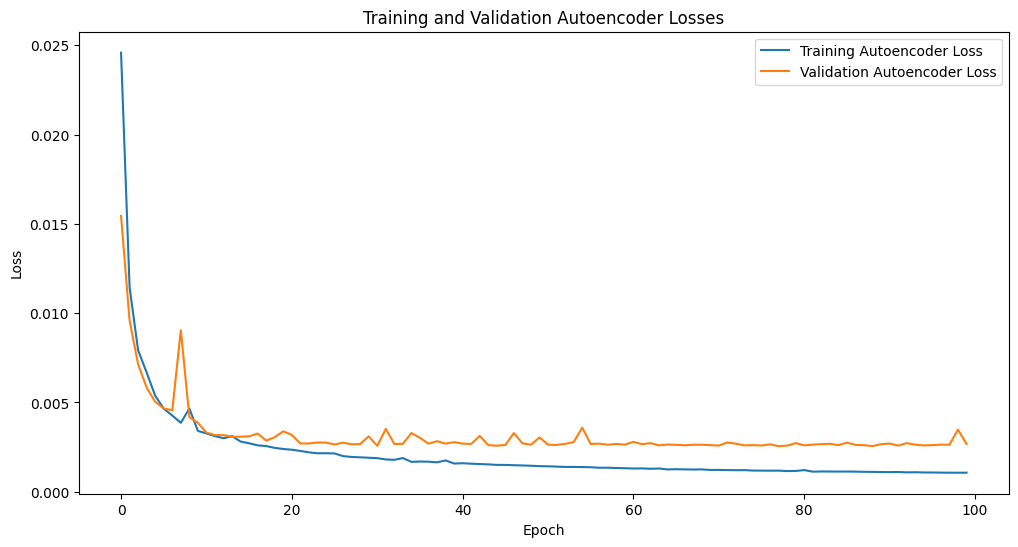

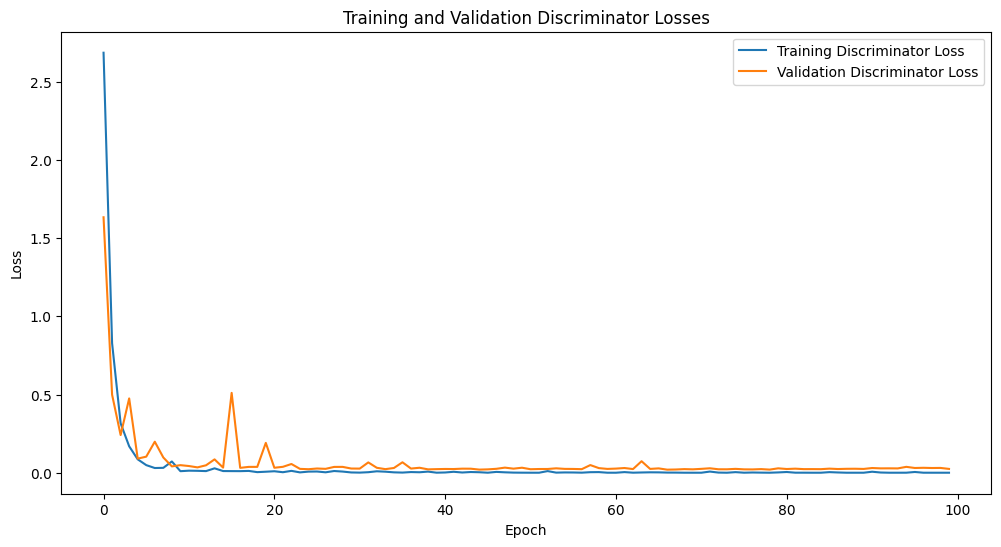

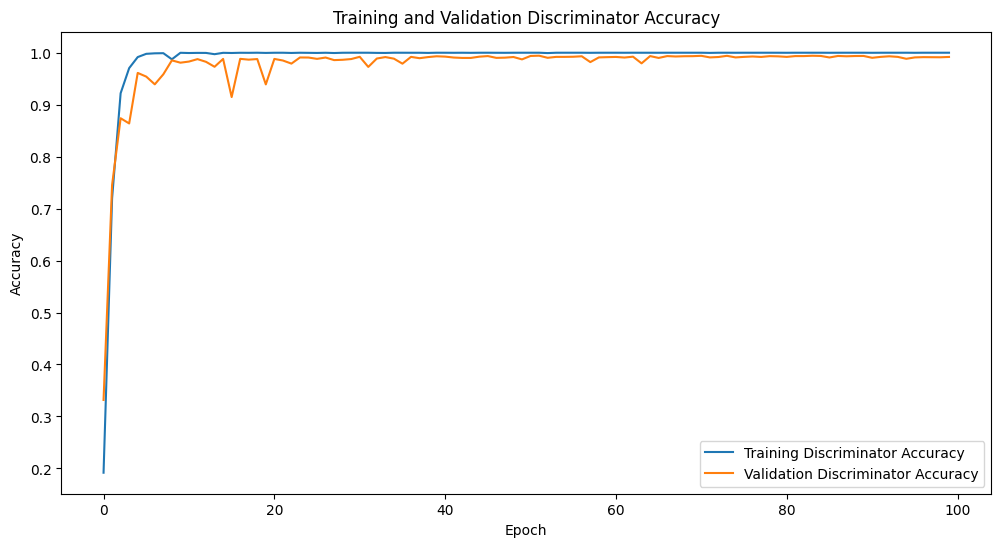

In [10]:
import matplotlib.pyplot as plt

# Plot autoencoder losses
plt.figure(figsize=(12, 6))
plt.plot(autoencoder_losses_epoch, label='Training Autoencoder Loss')
plt.plot(val_autoencoder_losses_epoch, label='Validation Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Autoencoder Losses')
plt.legend()
plt.savefig('autoencoder_losses.png')  # Save the plot as an image
plt.show()

# Plot discriminator losses
plt.figure(figsize=(12, 6))
plt.plot(discriminator_losses_epoch, label='Training Discriminator Loss')
plt.plot(val_discriminator_losses_epoch, label='Validation Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Discriminator Losses')
plt.legend()
plt.savefig('discriminator_losses.png')  # Save the plot as an image
plt.show()

# Plot discriminator accuracy
plt.figure(figsize=(12, 6))
plt.plot(discriminator_acc_epoch, label='Training Discriminator Accuracy')
plt.plot(val_discriminator_acc_epoch, label='Validation Discriminator Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Discriminator Accuracy')
plt.legend()
plt.savefig('discriminator_accuracy.png')  # Save the plot as an image
plt.show()


In [11]:
# Evaluate the discriminator on the train data
result = discriminator.evaluate(train_dataset)

# Print the result
print(f'Train Result: {result}')


 13/491 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 1.0000 - loss: 4.4489e-07


I0000 00:00:1715441992.947913      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


491/491 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 1.0000 - loss: 6.9678e-07

Train Result: [5.9174504940529e-07, 1.0]


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Convert numerical class labels to strings
# Define the path to the test images
import pandas as pd
df = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')
test_dir = '/kaggle/input/gtsrb-german-traffic-sign/'

df['ClassId'] = df['ClassId'].astype(str)

# Define image data generator with preprocessing steps for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from dataframe to preprocess test images
test_generator = test_datagen.flow_from_dataframe(
    df,
    directory=test_dir,
    x_col='Path',
    y_col='ClassId',
    target_size=(64, 64),
    batch_size=len(df),
    class_mode='categorical',  # 'categorical' returns one-hot encoded labels
    shuffle=False  # Do not shuffle for evaluation
)

# Get preprocessed test images and labels
X_test, y_test = next(test_generator)


Found 12630 validated image filenames belonging to 43 classes.


In [13]:
#130 epoch 93 percent

In [14]:
# Evaluate the discriminator on the test data   ##100 epoch
result = discriminator.evaluate(X_test, y_test)

# Print the result
print(f'Test Result: {result}')


395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9706 - loss: 0.1911

Test Result: [0.1912858933210373, 0.9701504111289978]


In [15]:
# Evaluate the discriminator on the test data   #125 epoch
result = discriminator.evaluate(X_test, y_test)

# Print the result
print(f'Test Result: {result}')


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9706 - loss: 0.1911

Test Result: [0.1912858933210373, 0.9701504111289978]


In [16]:
# Evaluate the discriminator on the test data  ##145 epoch
result = discriminator.evaluate(X_test, y_test)

# Print the result
print(f'Test Result: {result}')


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9706 - loss: 0.1911

Test Result: [0.1912858933210373, 0.9701504111289978]


In [17]:
import shutil
import os

# Specify the folder path
folder_path = '/kaggle/working/empty_folderf3'

# Create a zip file
shutil.make_archive(folder_path, 'zip', folder_path)

# Move the zip file to the output directory
output_path = '/kaggle/working/without_aug2.zip'
shutil.move(folder_path + '.zip', output_path)

# Display the download link
output_path
   

'/kaggle/working/without_aug2.zip'

In [18]:
discriminator.save('d_aug_valf.h5')